# Kaggle Competition - Home Credit Default Risk
## Exploatory Analysis

### Dataset Description

1. application_{train|test}.csv
 - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
 - Static data for all applications. One row represents one loan in our data sample.

2. bureau.csv
 - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
 - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

3. bureau_balance.csv
 - Monthly balances of previous credits in Credit Bureau.
 - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

4. POS_CASH_balance.csv
 - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

5. credit_card_balance.csv
 - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
 - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

6. previous_application.csv
 - All previous applications for Home Credit loans of clients who have loans in our sample.
 - There is one row for each previous application related to loans in our data sample.

7. installments_payments.csv
 - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
 - There is a) one row for every payment that was made plus b) one row each for missed payment.
 - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

8. HomeCredit_columns_description.csv
 - This file contains descriptions for the columns in the various data files.
 
##### Structure of the dataset
![Architecture of the data model](images/data_arc.png)

<div class="alert alert-warning">
<h5>Some terminologies you need to know...</h5>
<p><b><i>Credit bureau: </i></b>A credit bureau is a collection agency that gathers account information from various creditors and provides that information to a consumer reporting agency in the United States, a credit reference agency in the United Kingdom, a credit reporting body in Australia, a credit information company (CIC) in India, Special Accessing Entity in the Philippines, and also to private lenders.[1] It is not the same as a credit rating agency. - <a href="https://en.wikipedia.org/wiki/Credit_bureau">Source</a></p>
<p><b><i>Home Credit: </i></b>Our client</p>

</div>

Let's have a look of all datasets...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
pd.options.display.max_columns = 250

## 1. Train dataset, a.k.a. the application dataset. It is the static data for all applications

In [106]:
train_dataset = pd.read_csv("data/application_train.csv")
test_dataset = pd.read_csv("data/application_test.csv")

%time
print("Train dataset Info ------")
train_dataset.info(verbose=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Train dataset Info ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH  

In [107]:
print("Train dataset head ------")
train_dataset.head(n=2)

Train dataset head ------


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
test_dataset.head(n=2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [109]:
print("Train dataset descriptive statistics ------")
train_dataset.describe()

Train dataset descriptive statistics ------


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [110]:
test_dataset.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,0.080570,0.147161,0.229390,0.233854,0.065914,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,

In [111]:
# Explore the distribution of the target column
train_dataset['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [112]:
original_features = train_dataset.columns

For this, the problem is a kind of imbalanced classification problem, as there are far more repaid on time (TARGET=0) than not repaid on time (TARGET=1)

### Exploring missing values of the dataset

In [113]:
# Function to calculate missing values by column# Funct 
# https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [114]:
missing_values_table(train_dataset)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [115]:
missing_values_table(test_dataset)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


### Exploring column types

In [116]:
train_dataset.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [117]:
# Number of unique values of each object column on train dataset
train_dataset.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [118]:
# Number of unique values of each object column on test dataset
test_dataset.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

<div class="alert alert-warning">
<h5>One-hot encoding or Label encoding?...</h5>
<p>
    It depends on the machine learning algorithm you’re using. For a decision tree (Forest, XGB, etc.), it’s OK to encode categories using ordinal values (0, 1, 2, 3, etc). For an algorithm that learns a weight for each variable it’s not OK (Logistic regression, NN).
<p>

</div>

<div>
    <p>Here is a nice way to do label encoding in pandas <a href="https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe">(Link)</a></p>    
</div>

So, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

TODO: Operation - Label encoding if the number of unique class is with only 2 categories. One-hot encoding otherwise. 

In [119]:
# Loop through all the columns and coerce the type
for col in train_dataset.select_dtypes('object'):
    train_dataset[col] = train_dataset[col].astype('category')
    test_dataset[col] = test_dataset[col].astype('category')

In [120]:
for col in train_dataset.select_dtypes('category'):
    if len(list(train_dataset[col].unique())) <= 2:
        train_dataset[col] = train_dataset[col].cat.codes
        test_dataset[col] = test_dataset[col].cat.codes

In [121]:
train_dataset = pd.get_dummies(train_dataset)
test_dataset = pd.get_dummies(test_dataset)

In [122]:
print(train_dataset.shape)
print(test_dataset.shape)

(307511, 243)
(48744, 239)


In [123]:
train_dataset.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business 

#### Align the datasets
Since there are different number of classes in the categorical features of training and testing dataset, the feature that with more classes will be expanded to more features after one-hot encoding, while the feature that with less classes will be expanded to less columns. Thus we need to align the training and testing dataset. 

The align operation is essentially an 'join' & 'split' operation. The operation of the alignment can refer to <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.align.html">here</a>

Operation: Align the two datasets

In [124]:
# Take out the training target first, as after the alignment, the target will also be added to the testing dataset
target = train_dataset.TARGET

train_dataset, test_dataset = train_dataset.align(test_dataset, join='inner', axis=1)

In [125]:
# Add back target
train_dataset = train_dataset.assign(TARGET=target)

In [126]:
print("Train dataset shape: ", train_dataset.shape)
print("Test dataset shape: ", test_dataset.shape)

Train dataset shape:  (307511, 240)
Test dataset shape:  (48744, 239)


### Extreme values/Missing values analysis

In [127]:
import seaborn as sns
%matplotlib inline

In [128]:
sns.set(style="ticks", rc={'figure.figsize':(11.7,8.27)})

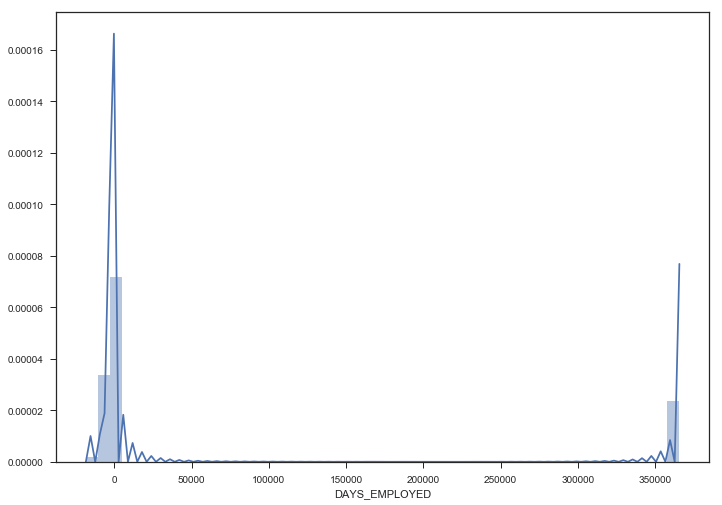

In [129]:
sns.distplot(train_dataset.DAYS_EMPLOYED)

`DAYS_EMPLOYED` should be a negative number. However, it is noticed that there are some positive numbers there, and there is an outlier in `DAYS_EMPLOYED`. Let's look closer into this. 

In [130]:
train_dataset[train_dataset.DAYS_EMPLOYED > 0].shape[0]

55374

In [131]:
train_dataset[train_dataset.DAYS_EMPLOYED > 0]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

Oh! There are 55374 rows of days employed that is positive and equals to 365243. It might be a special code to note down something. 

Here is what we can do. One of the solutions is to set this as missing value and then have them filled in by imputation. However, this might be a code with some special indication. Thus, as a solution, we need to fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [132]:
# Create an additional column for the anomoly indicator for training dataset
train_dataset = train_dataset.assign(DAYS_EMPLOYED_ANOMOLY = (train_dataset.DAYS_EMPLOYED == 365243))

train_dataset['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [133]:
# Create an additional column for the anomoly indicator for testing dataset
test_dataset = test_dataset.assign(DAYS_EMPLOYED_ANOMOLY = (test_dataset.DAYS_EMPLOYED == 365243))

test_dataset['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

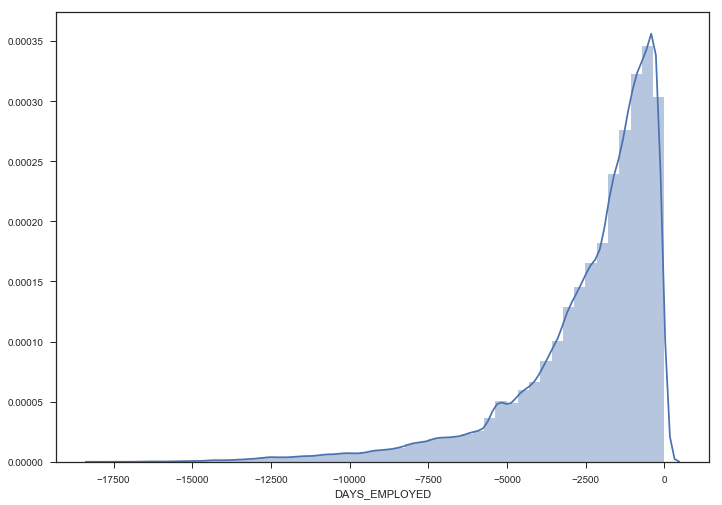

In [134]:
sns.distplot(train_dataset[train_dataset.DAYS_EMPLOYED_ANOMOLY == False].DAYS_EMPLOYED)

Flip the `DAYS_EMPLOYED` to positive as well

In [135]:
train_dataset.DAYS_EMPLOYED = abs(train_dataset.DAYS_EMPLOYED)

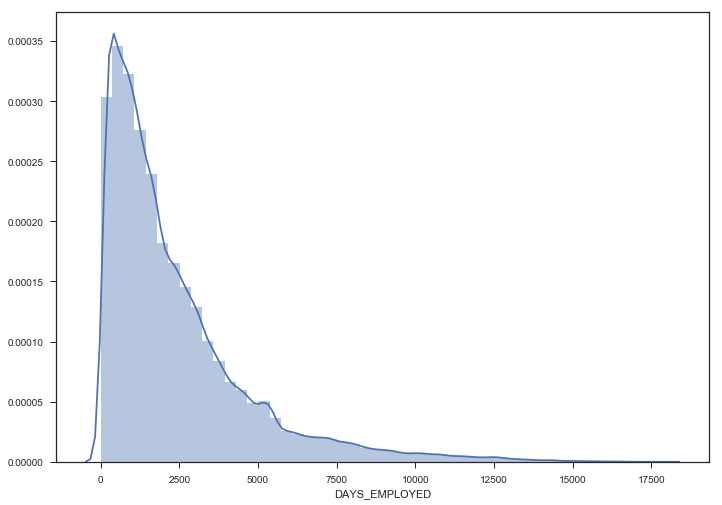

In [136]:
sns.distplot(train_dataset[train_dataset.DAYS_EMPLOYED_ANOMOLY == False].DAYS_EMPLOYED)

The distribution looks better now. As a follow up, we need to create a new column to indicate the DAYS_EMPLOYED is anomolous or not. 

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [137]:
print("There are %s anomolous data in train dataset and %s anomolous data in test dataset" \
      % (train_dataset.DAYS_EMPLOYED_ANOMOLY.sum(), test_dataset.DAYS_EMPLOYED_ANOMOLY.sum()))

There are 55374 anomolous data in train dataset and 9274 anomolous data in test dataset


Also we can fix the missing values of `APARTMENTS_AVG` by indicating whether the client reported a residential address or not. Let's call it `HAS_APARTMENT`

In [138]:
train_dataset = train_dataset.assign(HAS_APARTMENT = (train_dataset.APARTMENTS_AVG.isnull() == False))
test_dataset = test_dataset.assign(HAS_APARTMENT = (train_dataset.APARTMENTS_AVG.isnull() == False))

In [139]:
print("There are %s missing apartment data in train dataset and %s missing apartment data in test dataset" \
      % (train_dataset.HAS_APARTMENT.sum(), test_dataset.HAS_APARTMENT.sum()))

There are 151450 missing apartment data in train dataset and 24020 missing apartment data in test dataset


In [140]:
train_dataset.head(1)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

#### Correlation analysis

In [141]:
# Find correlations with the target and sort
correlations = train_dataset.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

So here we have `DAYS_BIRTH` as the most positive related feature, followed by `DAYS_EMPLOYED` and `REGION_RATING_CLIENT_W_CITY`. However, `DAYS_BIRTH` is the age in days of the client at the time of the loan, and it is in negative days. The positive correlations indicate that the the larger (Less negative, which means younger) the DAYS_BIRTH, the higher the chance to "default". It is a bit confusing by nature, so we will take absolute value of it and flip the correlation around. 

In [142]:
train_dataset.DAYS_BIRTH = abs(train_dataset.DAYS_BIRTH)

In [143]:
train_dataset.DAYS_BIRTH.corr(train_dataset.TARGET)

-0.07823930830982709

So now the correlation is negatively related. When the client get older, the default risk is lower. Now, let's see the distribution of age. In order to convert it back to years old, the DAYS_BIRTH is divided by 365

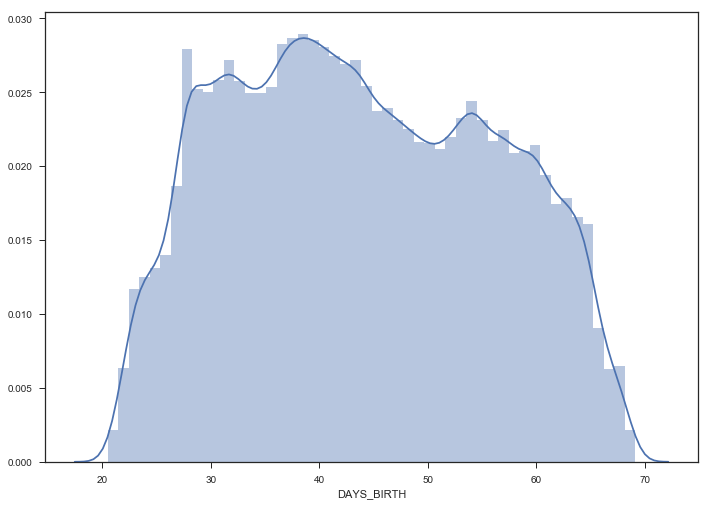

In [144]:
sns.distplot(train_dataset.DAYS_BIRTH/365)

To better visualize the effect of age on the target, we will make a kernel density estimation plot (KDE plot), coloured by the value of the target. 

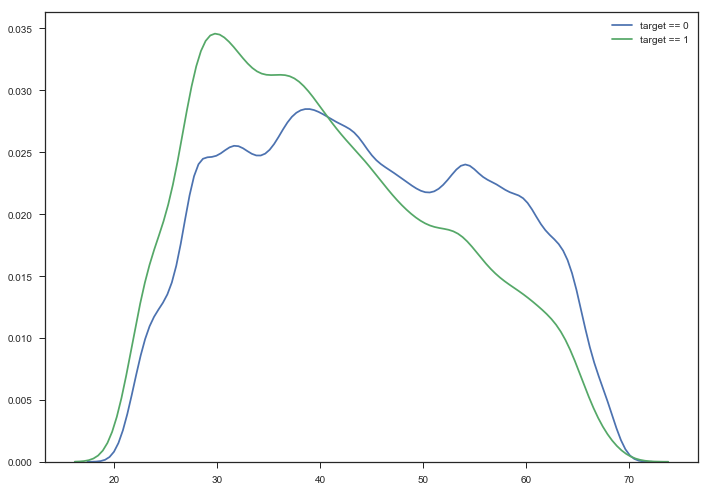

In [145]:
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==0, 'DAYS_BIRTH']/365, label='target == 0')
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==1, 'DAYS_BIRTH']/365, label='target == 1')

<b>Tips: </b> When working with age, it is usually a good idea to bin them into different age group. For now, we first `cut` the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target. 

In [146]:
# Separate the age data into another data frame
age_data = train_dataset[['TARGET', 'DAYS_BIRTH']]
age_data = age_data.assign(YEARS_BIRTH=age_data.DAYS_BIRTH/365)

# Bin the age data
age_data = age_data.assign(YEARS_BINNER=pd.cut(age_data.YEARS_BIRTH, bins=np.linspace(20, 70, num=11)))

In [147]:
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNER
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [148]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNER').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNER,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


<b>Tips: </b> When dealing with binary data, mean(TARGET) = success rate

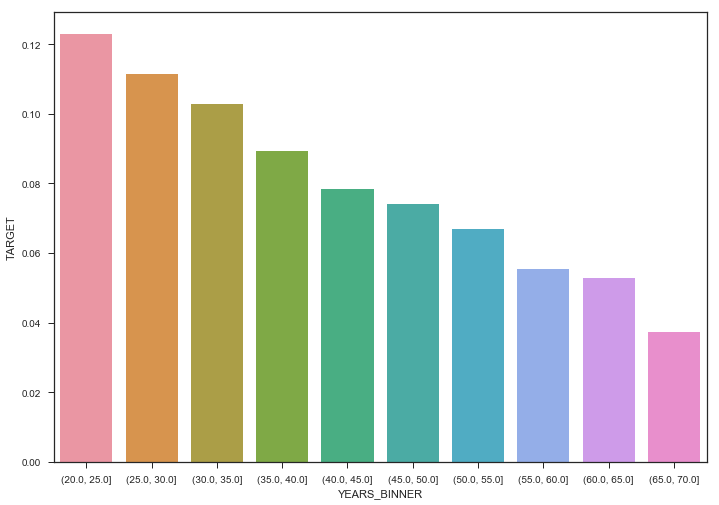

In [149]:
sns.barplot(x=age_groups.index, y="TARGET", data=age_groups)

## Feature Engineering

Feature engineering is the key of winning model. Feature engineering refers to a general process and can involve both feature construction: 
- Adding new features from existing data
- Feature seelction: Choosing only the most important features
- Dimensionality reduction

We will do a lot of feature engineering when we start using other data sources. For this notebook, we will begin with the training dataset only

### Polynomial Features
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [150]:
train_dataset['AMT_ANNUITY'] = train_dataset['AMT_ANNUITY'].fillna(0)
test_dataset['AMT_ANNUITY'] = test_dataset['AMT_ANNUITY'].fillna(0)

In [151]:
train_dataset['DAYS_EMPLOYED'] = train_dataset['DAYS_EMPLOYED'].fillna(0)
train_dataset['DAYS_BIRTH'] = train_dataset['DAYS_BIRTH'].fillna(0)

test_dataset['DAYS_EMPLOYED'] = test_dataset['AMT_ANNUITY'].fillna(0)
test_dataset['DAYS_BIRTH'] = test_dataset['AMT_ANNUITY'].fillna(0)

In [152]:
train_dataset['CREDIT_INCOME_PERCENT'] = train_dataset['AMT_CREDIT'] / train_dataset['AMT_INCOME_TOTAL']
train_dataset['ANNUITY_INCOME_PERCENT'] = train_dataset['AMT_ANNUITY'] / train_dataset['AMT_INCOME_TOTAL']
train_dataset['CREDIT_TERM'] = train_dataset['AMT_ANNUITY'] / train_dataset['AMT_CREDIT']
train_dataset['DAYS_EMPLOYED_PERCENT'] = train_dataset['DAYS_EMPLOYED'] / train_dataset['DAYS_BIRTH']

In [153]:
test_dataset['CREDIT_INCOME_PERCENT'] = test_dataset['AMT_CREDIT'] / test_dataset['AMT_INCOME_TOTAL']
test_dataset['ANNUITY_INCOME_PERCENT'] = test_dataset['AMT_ANNUITY'] / test_dataset['AMT_INCOME_TOTAL']
test_dataset['CREDIT_TERM'] = test_dataset['AMT_ANNUITY'] / test_dataset['AMT_CREDIT']
test_dataset['DAYS_EMPLOYED_PERCENT'] = test_dataset['DAYS_EMPLOYED'] / test_dataset['DAYS_BIRTH']

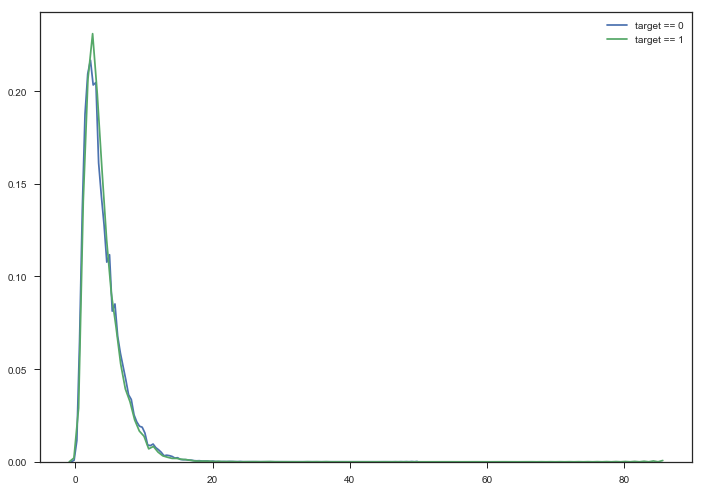

In [154]:
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==0, 'CREDIT_INCOME_PERCENT'], label='target == 0')
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==1, 'CREDIT_INCOME_PERCENT'], label='target == 1')

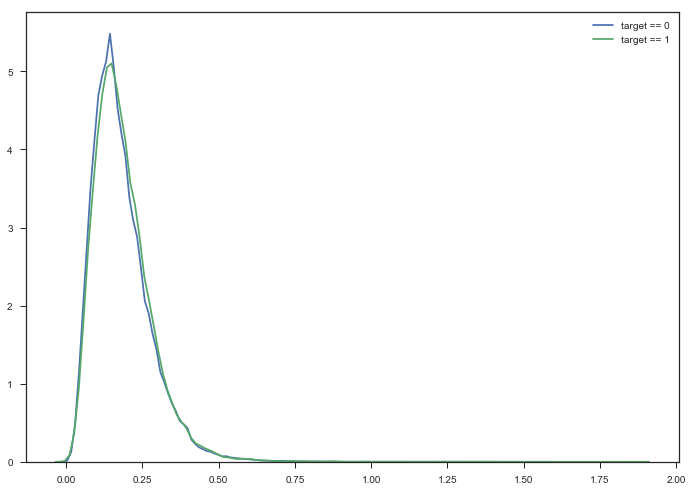

In [155]:
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==0, 'ANNUITY_INCOME_PERCENT'], label='target == 0')
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==1, 'ANNUITY_INCOME_PERCENT'], label='target == 1')

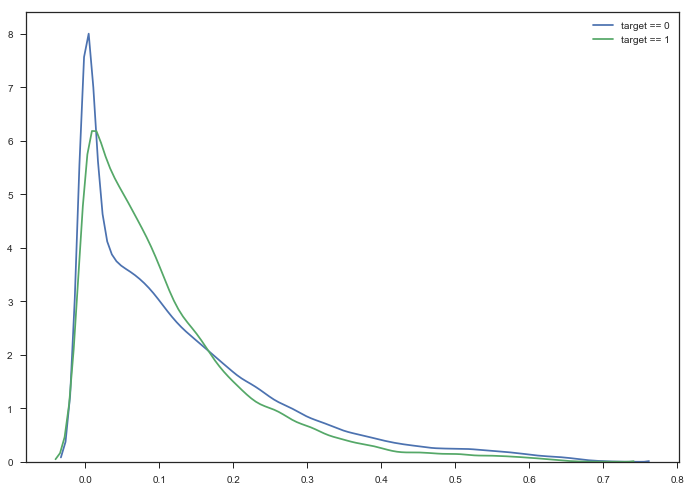

In [156]:
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==0, 'DAYS_EMPLOYED_PERCENT'], label='target == 0')
sns.kdeplot(train_dataset.loc[train_dataset['TARGET']==1, 'DAYS_EMPLOYED_PERCENT'], label='target == 1')

In [157]:
# Find correlations with the target and sort
correlations = train_dataset.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

# Modelling

## Baseline model

### Missing value imputation

In [158]:
missing_values_table(train_dataset)

Your selected dataframe has 246 columns.
There are 60 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_MODE,208642,67.8


In [159]:
# Fillna of EXT_SOURCE_1/2/3 to 0
train_dataset['EXT_SOURCE_1'] = train_dataset['EXT_SOURCE_1'].fillna(0)
train_dataset['EXT_SOURCE_2'] = train_dataset['EXT_SOURCE_2'].fillna(0)
train_dataset['EXT_SOURCE_3'] = train_dataset['EXT_SOURCE_3'].fillna(0)

test_dataset['EXT_SOURCE_1'] = test_dataset['EXT_SOURCE_1'].fillna(0)
test_dataset['EXT_SOURCE_2'] = test_dataset['EXT_SOURCE_2'].fillna(0)
test_dataset['EXT_SOURCE_3'] = test_dataset['EXT_SOURCE_3'].fillna(0)

In [160]:
train_dataset.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'TARGET', 'DAYS_EMPLOYED_ANOMOLY',
       'HAS_APARTMENT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT',
       'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'],
      dtype='object', length=246)

In [161]:
test_dataset.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes',
       'DAYS_EMPLOYED_ANOMOLY', 'HAS_APARTMENT', 'CREDIT_INCOME_PERCENT',
       'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'],
      dtype='object', length=245)

In [162]:
train_SK_ID_CURR = train_dataset['SK_ID_CURR']
target = train_dataset['TARGET']
test_SK_ID_CURR = test_dataset['SK_ID_CURR']

train = train_dataset.drop(['SK_ID_CURR', 'TARGET'], axis=1)
test = test_dataset.drop(['SK_ID_CURR'], axis=1)

features = train.columns

In [163]:
print(train.shape)
print(test.shape)

(307511, 244)
(48744, 244)


### Pre-processing and transformation

#### Imputation

In [61]:
# For the rest, we will perform a median imputation
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [62]:
imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

#### Scale Transformation - MinMaxScaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [64]:
# View size before training
print("Shape of train_dataset: ", train.shape)
print("Shape of test_dataset: ", test.shape)

Shape of train_dataset:  (307511, 244)
Shape of test_dataset:  (48744, 244)


## Baseline model - Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.0001)

log_reg.fit(train, target)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
# use log_reg.proba to get the prediction probaility
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [67]:
submit = test_SK_ID_CURR.to_frame()
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.050871
1,100005,0.096014
2,100013,0.039149
3,100028,0.035234
4,100038,0.099852


In [68]:
submit.to_csv('log_reg_baseline.csv', index = False)

The baseline result is 0.628.

### Improved model with Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=50, verbose=1, n_jobs=-1)

In [70]:
rf.fit(train, target)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [71]:
# Extract features importance
feature_importance_values = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [72]:
def plot_feature_importance(df): 
    """
    Plot the top 15 importance of the features
    
    param: 
        Feature importance dataframe - Must have a column called `feature` and `importance`
    returns: 
        Show a plot of top 15 important features
        return a dataframe that is sorted by importance with a column of normalized score
    """
    
    df = df.sort_values('importance').reset_index()
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df_plot = df.sort_values('importance_normalized', ascending=False).head(15)
    
    sns.barplot(x='importance_normalized', y='feature', data=df_plot)

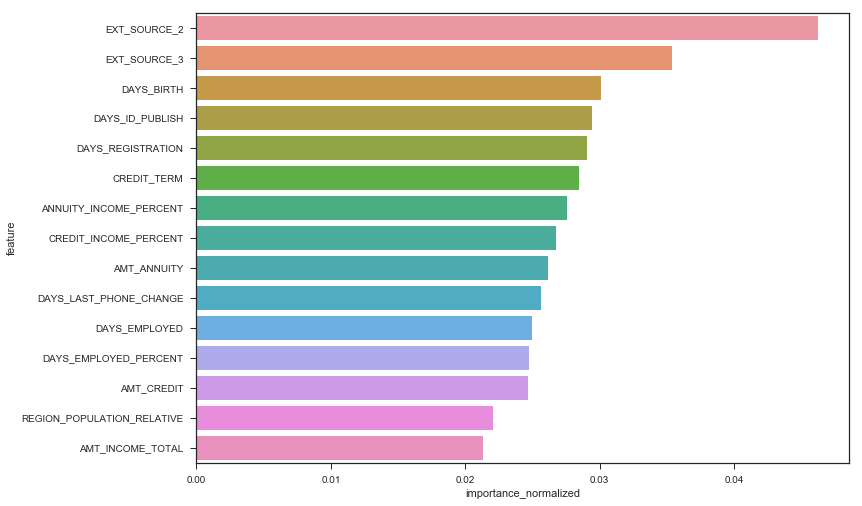

In [73]:
plot_feature_importance(feature_importance)

In [74]:
rf_pred = rf.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.1s finished


In [75]:
submit = test_SK_ID_CURR.to_frame()
submit['TARGET'] = rf_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.050
1,100005,0.114
2,100013,0.108
3,100028,0.062
4,100038,0.216


In [76]:
submit.to_csv("submit_rf.csv", index=False)

The random forest model scores 0.697

From the importance of the RF model, it seems that the engineered feature by using domain knowledge are quite important, especially for `CREDIT_TERM`, `ANNUITY_INCOME_PERCENT` and `CREDIT_INCOME_PERCENT`
Since there are only a little bit of improvement by the RF model. Maybe it's time to do some feature engineering!

# More Feature Engineering from other dataset

## EDA on Bureau dataset

In [77]:
bureau = pd.read_csv("data/bureau.csv")

In [78]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


So what is the bureau dataset? It is a transaction record from CR Bureau of all loan borrowers

In [164]:
# Feature 1 - Number of loan
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'COUNT_RECORD'})

In [165]:
previous_loan_counts.head(5)

,SK_ID_CURR,COUNT_RECORD
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [166]:
# Join it with the training dataframe
temp = train_dataset.merge(previous_loan_counts, on='SK_ID_CURR', how='left')

# Fill the loan borrows with no previous records as 0
temp['COUNT_RECORD'] = temp['COUNT_RECORD'].fillna(0)

In [167]:
temp.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

### Assessing the usefulness of new features with r value
To determine whether a new feature is useful, we can run a pearson correlation between the new feature and the target variable. Of course, the r-value is not the best measurement of their correlation, as pearson correlation only measutres <b>Linear Relationship</b> between two variables, but it can still give an approximation to indicate whether the feature is useful or not. 

On the other hand, we can also visualize the relationship by using the KDE plot

In [168]:
def plot_KDE(var_name, df, target="TARGET"): 
    """
    An utility function that helps to plot a KDE curve for `var_name`
    params: 
    var_name: The variable name - str
    df: The dataframe - pd.DataFrame
    target: 
    """
    
    # Calculate the correlation coefficient between new variable and target
    corr = df[target].corr(df[var_name])
    
    # Show value counts
    df[var_name].value_counts()
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET']==0, var_name], label='target == 0')
    sns.kdeplot(df.loc[df['TARGET']==1, var_name], label='target == 1')
    
    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title("%s Distribution" % var_name)
    plt.legend()
    
    # Print the result
    print("The correlation between %s and %s is %.2f" % (target, var_name, corr))

The correlation between TARGET and COUNT_RECORD is -0.01


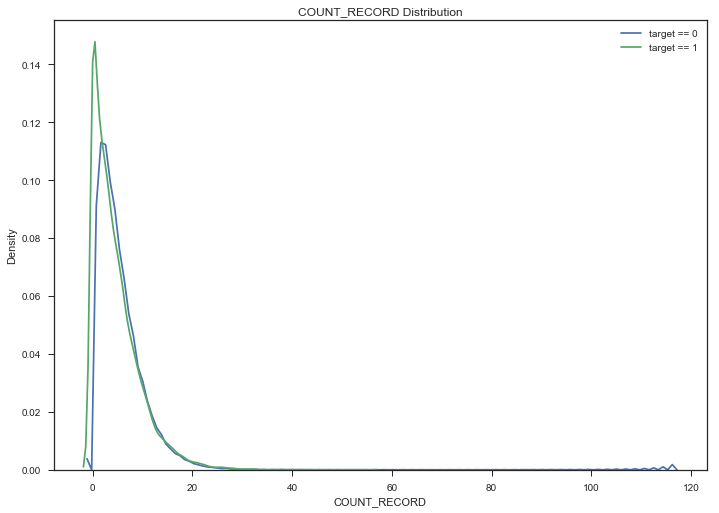

In [169]:
plot_KDE("COUNT_RECORD", temp, target="TARGET")

It is hard to say whether this is useful or not at this moment, but the pearson correlation is low. Let's try other features

In [170]:
# Aggregate all features in the bureau dataset
bureau_agg = bureau.drop(columns=["SK_ID_BUREAU"])\
                   .groupby("SK_ID_CURR")\
                   .agg(['count', 'mean', 'max', 'min', 'sum'])\
                   .reset_index()

In [171]:
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                   DAYS_CREDIT_ENDDATE                                      \
  mean max min sum               count        mean     max     min     sum   
0  0.0   0   0   0                   7   82.428571  1778.0 -1329.0   577.0   
1  0.0   0   0   0                   6 -349.000000   780.0 -1072.0 -2094.0   
2  0.0   0   0   0                   4 -544.500000  1216.0 -2434.0 -2178.0   
3  0.0   0   0   0                   2 -488.500000  -382.0  -595.0  -977.0   
4  0.0   0   0   0                   3  439.333333  1324.0  -128.0  1318.0   

  DAYS_ENDDATE_FACT                                      \
              count         mean    max     min     sum   
0                 4  -825.500000 -544.0 -1328.0 -3302.0   
1                 6  -697.500000  -36.0 -1185.0 -4185.0   
2                 3 -1097.333333 -540.0 -2131.0 -3292.0   
3                 2  -532.500000 -382.0  -683.0 -1065.0   
4                 1  -123.000000 -123.0  -123.0  -123.0   

  AMT_CREDIT_MAX_OVERDUE                                     \
                   count      mean       max  min       sum   
0                      0       NaN       NaN  NaN       NaN   
1                      5  1681.029  5043.645  0.0  8405.145   
2                      4     0.000     0.000  0.0     0.000   
3                      1     0.000     0.000  0.0     0.000   
4                      1     0.000     0.000  0.0     0.000   

  CNT_CREDIT_PROLONG                  AMT_CREDIT_SUM                           \
               count mean max min sum          count           mean       max   
0                  7  0.0   0   0   0              7  207623.571429  378000.0   
1                  8  0.0   0   0   0              8  108131.945625  450000.0   
2                  4  0.0   0   0   0              4  254350.125000  810000.0   
3                  2  0.0   0   0   0              2   94518.900000   94537.8   
4                  3  0.0   0   0   0              3  219042.000000  568800.0   

                        AMT_CREDIT_SUM_DEBT                                \
       min          sum               count           mean       max  min   
0  85500.0  1453365.000                   7   85240.928571  373239.0  0.0   
1      0.0   865055.565                   5   49156.200000  245781.0  0.0   
2  22248.0  1017400.500                   4       0.000000       0.0  0.0   
3  94500.0   189037.800                   2       0.000000       0.0  0.0   
4  29826.0   657126.000                   3  189469.500000  543087.0  0.0   

            AMT_CREDIT_SUM_LIMIT                                             \
        sum                count          mean         max  min         sum   
0  596686.5                    6       0.00000       0.000  0.0       0.000   
1  245781.0                    4    7997.14125   31988.565  0.0   31988.565   
2       0.0                    4  202500.00000  810000.000  0.0  810000.000   
3       0.0                    2       0.00000       0.000  0.0       0.000   
4  568408.5                    3       0.00000       0.000  0.0       0.000   

  AMT_CREDIT_SUM_OVERDUE                     DAYS_CREDIT_UPDATE              \
                   count mean  max  min  sum              count        mean   
0                      7  0.0  0.0  0.0  0.0                  7  -93.142857   
1                      8  0.0  0.0  0.0  0.0                  8 -499.875000   
2                      4  0.0  0.0  0.0  0.0                  4 -816.000000   
3 

<b>Tip: </b>A quick way to convert all aggregated columns into new columns

In [172]:
bureau_agg.columns.levels[1]

Index(['count', 'mean', 'max', 'min', 'sum', ''], dtype='object')

In [173]:
# New data frame columns
columns = ['SK_ID_CURR']

# Iterate through the variable names
for var in bureau_agg.columns.levels[0]:
    
    # Skip the id
    if var != "SK_ID_CURR": 
    
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append("bureau_%s_%s" % (var, stat))

In [174]:
# A quick renaming trick here!
bureau_agg.columns = columns
bureau_agg.head(5)

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-1329.0,577.0,4,-825.500000,-544.0,-1328.0,-3302.0,0,NaN,NaN,NaN,NaN,7,0.0,0,0,0,7,207623.571429,378000.0,85500.0,1453365.000,7,85240.928571,373239.0,0.0,596686.5,6,0.00000,0.000,0.0,0.000,7,0.0,0.0,0.0,0.0,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,0,6,-349.000000,780.0,-1072.0,-2094.0,6,-697.500000,-36.0,-1185.0,-4185.0,5,1681.029,5043.645,0.0,8405.145,8,0.0,0,0,0,8,108131.945625,450000.0,0.0,865055.565,5,49156.200000,245781.0,0.0,245781.0,4,7997.14125,31988.565,0.0,31988.565,8,0.0,0.0,0.0,0.0,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,0,4,-544.500000,1216.0,-2434.0,-2178.0,3,-1097.333333,-540.0,-2131.0,-3292.0,4,0.000,0.000,0.0,0.000,4,0.0,0,0,0,4,254350.125000,810000.0,22248.0,1017400.500,4,0.000000,0.0,0.0,0.0,4,202500.00000,810000.000,0.0,810000.000,4,0.0,0.0,0.0,0.0,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,0,2,-488.500000,-382.0,-595.0,-977.0,2,-532.500000,-382.0,-683.0,-1065.0,1,0.000,0.000,0.0,0.000,2,0.0,0,0,0,2,94518.900000,94537.8,94500.0,189037.800,2,0.000000,0.0,0.0,0.0,2,0.00000,0.000,0.0,0.000,2,0.0,0.0,0.0,0.0,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,0,3,439.333333,1324.0,-128.0,1318.0,1,-123.000000,-123.0,-123.0,-123.0,1,0.000,0.000,0.0,0.000,3,0.0,0,0,0,3,219042.000000,568800.0,29826.0,657126.000,3,189469.500000,543087.0,0.0,568408.5,3,0.00000,0.000,0.0,0.000,3,0.0,0.0,0.0,0.0,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


Now, simply merge back the dataframe to your train dataframe and test dataframe

In [175]:
temp = train_dataset.merge(bureau_agg, on="SK_ID_CURR", how="left")
temp.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,...,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSM

In [176]:
# Print missing values
missing_values_table(temp)

Your selected dataframe has 306 columns.
There are 117 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_sum,227502,74.0
bureau_AMT_ANNUITY_min,227502,74.0
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4


In [177]:
# Get the correlations of the new features
correlations = []

# Iterate through all columns 
for col in columns: 
    correlations.append((col, temp["TARGET"].corr(temp[col])))

Sort the list of tuples by using 

`data.sort(key=lambda tup: tup[1])  # sorts in place`

In [178]:
sorted_correlations = sorted(correlations, key = lambda x: abs(x[1]), reverse = True)
sorted_correlations[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998128),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010387),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968676),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392032),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05423535215303945),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758576),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997315),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483549),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.04286392247073026),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484674),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306008),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.03895685483662508),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03658963469632919),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616135),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325526)]

Take a look at the highest correlated feature

The correlation between TARGET and bureau_DAYS_CREDIT_mean is 0.09


/Users/admin/Documents/Envs/datasci/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/admin/Documents/Envs/datasci/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


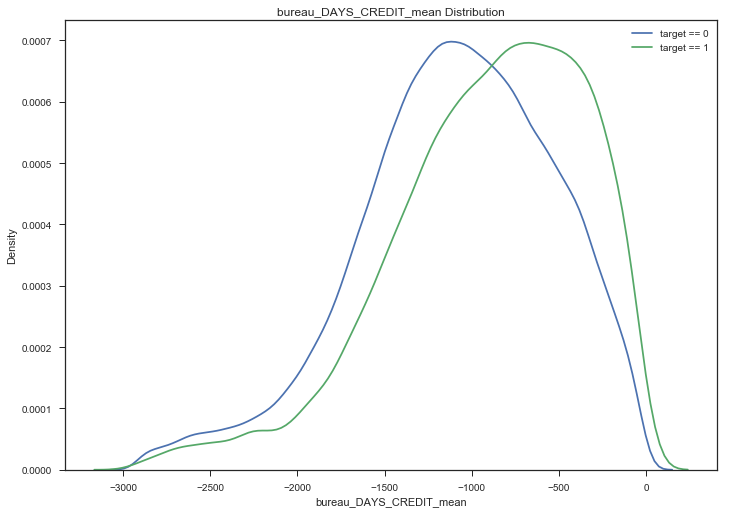

In [179]:
plot_KDE("bureau_DAYS_CREDIT_mean", temp, target="TARGET")

### Multiple comparison problems
When we have a lot of variables, we are kind of running into a [multiple comparison problem](https://towardsdatascience.com/the-multiple-comparisons-problem-e5573e8b9578).

The multiple comparison problem means that when we have a large amount of features, the features we found that with weak correlation with the target, is likely caused by the noise rather than the signal. Then, if we use these variables to train the model, we might overfit the data. 

> The CEO has a drug that he wants to sell but it doesn’t do what it was designed for. Instead of admitting failure, he instructs his researchers to keep looking until they find some vital sign the drug improves. Even if the drug has absolutely no effect on any health markers, the researchers will eventually find it does improve some measures because of random noise in the data. For this reason, the multiple comparisons problem is also called the look-elsewhere effect: if a researcher doesn’t find the result she wants, she can just keep looking until she finds some beneficial effect!

### Encapsulating the aggregation operations and finding correlations into a function

A function for aggregating the numeric metrics

In [180]:
def agg_numeric(df, group_agg_var, column_prefix): 
    """
    A function that takes in a pandas dataframe, perform aggregation, and rename the column names to become new features
    
    params: 
    df: The original dataframe - A pandas dataframe
    group_agg_var: The variable to group by on. e.g. SK_ID_CURR - str
    column_prefix: The prefix of the new columns - str
    
    return: 
    df_agg: The aggregated dataframe - A pandas dataframe
    columns: A list of column names - list
    """
    # Aggregate all features in the bureau dataset
    df_agg = df.groupby(group_agg_var)\
               .agg(['count', 'mean', 'max', 'min', 'sum'])\
               .reset_index()
            
    
    # New data frame columns
    columns = [group_agg_var]

    # Iterate through the variable names
    for var in df_agg.columns.levels[0]:

        # Skip the id
        if var != group_agg_var: 

            # Iterate through the stat names
            for stat in df_agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append("%s_%s_%s" % (column_prefix, var, stat))
    
    # Replace the column names
    df_agg.columns = columns
                
    return df_agg, columns

In [181]:
bureau_agg, columns = agg_numeric(bureau.drop(columns=["SK_ID_BUREAU"]), group_agg_var="SK_ID_CURR", column_prefix="bureau")

In [182]:
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-1329.0,577.0,4,-825.500000,-544.0,-1328.0,-3302.0,0,NaN,NaN,NaN,NaN,7,0.0,0,0,0,7,207623.571429,378000.0,85500.0,1453365.000,7,85240.928571,373239.0,0.0,596686.5,6,0.00000,0.000,0.0,0.000,7,0.0,0.0,0.0,0.0,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,0,6,-349.000000,780.0,-1072.0,-2094.0,6,-697.500000,-36.0,-1185.0,-4185.0,5,1681.029,5043.645,0.0,8405.145,8,0.0,0,0,0,8,108131.945625,450000.0,0.0,865055.565,5,49156.200000,245781.0,0.0,245781.0,4,7997.14125,31988.565,0.0,31988.565,8,0.0,0.0,0.0,0.0,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,0,4,-544.500000,1216.0,-2434.0,-2178.0,3,-1097.333333,-540.0,-2131.0,-3292.0,4,0.000,0.000,0.0,0.000,4,0.0,0,0,0,4,254350.125000,810000.0,22248.0,1017400.500,4,0.000000,0.0,0.0,0.0,4,202500.00000,810000.000,0.0,810000.000,4,0.0,0.0,0.0,0.0,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,0,2,-488.500000,-382.0,-595.0,-977.0,2,-532.500000,-382.0,-683.0,-1065.0,1,0.000,0.000,0.0,0.000,2,0.0,0,0,0,2,94518.900000,94537.8,94500.0,189037.800,2,0.000000,0.0,0.0,0.0,2,0.00000,0.000,0.0,0.000,2,0.0,0.0,0.0,0.0,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,0,3,439.333333,1324.0,-128.0,1318.0,1,-123.000000,-123.0,-123.0,-123.0,1,0.000,0.000,0.0,0.000,3,0.0,0,0,0,3,219042.000000,568800.0,29826.0,657126.000,3,189469.500000,543087.0,0.0,568408.5,3,0.00000,0.000,0.0,0.000,3,0.0,0.0,0.0,0.0,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [183]:
# Really merge it this time
train_dataset = train_dataset.merge(bureau_agg, on="SK_ID_CURR", how="left")

In [184]:
# Join back the record count
train_dataset = train_dataset.merge(previous_loan_counts, on="SK_ID_CURR", how="left")

In [185]:
train_dataset.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'bureau_DAYS_CREDIT_UPDATE_mean', 'bureau_DAYS_CREDIT_UPDATE_max',
       'bureau_DAYS_CREDIT_UPDATE_min', 'bureau_DAYS_CREDIT_UPDATE_sum',
       'bureau_AMT_ANNUITY_count', 'bureau_AMT_ANNUITY_mean',
       'bureau_AMT_ANNUITY_max', 'bureau_AMT_ANNUITY_min',
       'bureau_AMT_ANNUITY_sum', 'COUNT_RECORD'],
      dtype='object', length=307)

Another one is the correlation function

In [186]:
def list_corr(df, target="TARGET", columns=None): 
    """
    A function to calculation the pearson correlations of the specified columns
    
    params:
    df: The dataframe - A pandas dataframe
    target: The target variable name. Default is `TARGET`
    columns: The columns for calculating the correlations. 
             If not specified, the correlations of all columns to target will be calculated
             
    return: 
    correlations: A list of tuples
    """
    
    # List of correlations
    correlations = []
    
    # Iterate through all columns 
    if columns:
        for col in columns: 
            correlations.append((col, df[target].corr(df[col])))
    else:
        for col in df.columns: 
            if col ==  target:
                continue
            correlations.append((col, df[target].corr(df[col])))
            
    correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)
    
    return correlations

In [187]:
list_corr(train_dataset)[:15]

[('EXT_SOURCE_2', -0.15902967651017447),
 ('EXT_SOURCE_3', -0.11957192848712489),
 ('bureau_DAYS_CREDIT_mean', 0.08972896721998128),
 ('DAYS_BIRTH', -0.07823930830982709),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010387),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968676),
 ('EXT_SOURCE_1', -0.06469813333590467),
 ('REGION_RATING_CLIENT_W_CITY', 0.060892667564823616),
 ('REGION_RATING_CLIENT', 0.05889901494571277),
 ('NAME_INCOME_TYPE_Working', 0.05748118481836537),
 ('NAME_EDUCATION_TYPE_Higher education', -0.056592644140963676),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392032),
 ('DAYS_LAST_PHONE_CHANGE', 0.05521848351345953),
 ('CODE_GENDER_M', 0.054712681971271514),
 ('CODE_GENDER_F', -0.05470405317880812)]

### Handling categorical variables
It is a bit tricky in handling categorical variables, as we cannot simply calculate the aggregation of these variables. Metrics such as mean and max only work with numeric variables. Instead, we will rely on calculating the value counts of each category of the variable. 

<b>Operation: One-hot encoding, and then do a sum and mean (As a kind of normalized score)</b>

In [188]:
# One hot encoding on the bureau dataset
bureau.select_dtypes('object').columns

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

In [189]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))

In [190]:
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']

In [191]:
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354


In [192]:
# Make groupings on the categorical data
categorical_grouped = categorical.groupby("SK_ID_CURR")\
                                 .agg(["sum", "mean"])\
                                 .reset_index()

In [193]:
categorical_grouped.head()

SK_ID_CURR CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                              sum      mean                    sum mean   
0     100001                    3  0.428571                      0  0.0   
1     100002                    2  0.250000                      0  0.0   
2     100003                    1  0.250000                      0  0.0   
3     100004                    0  0.000000                      0  0.0   
4     100005                    2  0.666667                      0  0.0   

  CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                   sum      mean                sum mean   
0                    4  0.571429                  0  0.0   
1                    6  0.750000                  0  0.0   
2                    3  0.750000                  0  0.0   
3                    2  1.000000                  0  0.0   
4                    1  0.333333                  0  0.0   

  CREDIT_CURRENCY_currency 1      CREDIT_CURRENCY_currency 2       \
                         sum mean                        sum mean   
0                          7  1.0                          0  0.0   
1                          8  1.0                          0  0.0   
2                          4  1.0                          0  0.0   
3                          2  1.0                          0  0.0   
4                          3  1.0                          0  0.0   

  CREDIT_CURRENCY_currency 3      CREDIT_CURRENCY_currency 4       \
                         sum mean                        sum mean   
0                          0  0.0                          0  0.0   
1                          0  0.0                          0  0.0   
2                          0  0.0                          0  0.0   
3                          0  0.0                          0  0.0   
4                          0  0.0                          0  0.0   

  CREDIT_TYPE_Another type of loan      CREDIT_TYPE_Car loan       \
                               sum mean                  sum mean   
0                                0  0.0                    0  0.0   
1                                0  0.0                    0  0.0   
2                                0  0.0                    0  0.0   
3                                0  0.0                    0  0.0   
4                                0  0.0                    0  0.0   

  CREDIT_TYPE_Cash loan (non-earmarked)      CREDIT_TYPE_Consumer credit  \
                                    sum mean                         sum   
0                                     0  0.0                           7   
1                                     0  0.0                           4   
2                                     0  0.0                           2   
3                                     0  0.0                           2   
4                                     0  0.0                           2   

            CREDIT_TYPE_Credit card           CREDIT_TYPE_Interbank credit  \
       mean                     sum      mean                          sum   
0  1.000000                       0  0.000000                            0   
1  0.500000                       4  0.500000                            0   
2  0.500000                       2  0.500000                            0   
3  1.000000                       0  0.000000                            0   
4  0.666667                       1  0.333333                            0   

       CREDIT_TYPE_Loan for business development       \
  mean                                       sum mean   
0  0.0                                         0  0.0   
1  0.0                                         0  0.0   
2  0.0                                         0  0.0   
3  0.0                                         0  0.0   
4  0.0                                         0  0.0   

  CREDIT_TYPE_Loan for purchase of shares (margin lending)       \
                                                       s

In the above dataframe, the `sum` column represents the count and the `mean` column represents the normalized count. 

In [194]:
# Expand the grouped variables into new columns again
columns = ['SK_ID_CURR']

for var in categorical_grouped.columns.levels[0]:
    
    # Skip the SK_ID_CURR column
    if var == "SK_ID_CURR": 
        continue
        
    for stat in categorical_grouped.columns.levels[1][:-1]: 
        columns.append("bureau_%s_%s" % (var, stat))

In [195]:
categorical_grouped.columns = columns

In [196]:
categorical_grouped.head()

,SK_ID_CURR,burean_CREDIT_ACTIVE_Active_sum,burean_CREDIT_ACTIVE_Active_mean,burean_CREDIT_ACTIVE_Bad debt_sum,burean_CREDIT_ACTIVE_Bad debt_mean,burean_CREDIT_ACTIVE_Closed_sum,burean_CREDIT_ACTIVE_Closed_mean,burean_CREDIT_ACTIVE_Sold_sum,burean_CREDIT_ACTIVE_Sold_mean,burean_CREDIT_CURRENCY_currency 1_sum,burean_CREDIT_CURRENCY_currency 1_mean,burean_CREDIT_CURRENCY_currency 2_sum,burean_CREDIT_CURRENCY_currency 2_mean,burean_CREDIT_CURRENCY_currency 3_sum,burean_CREDIT_CURRENCY_currency 3_mean,burean_CREDIT_CURRENCY_currency 4_sum,burean_CREDIT_CURRENCY_currency 4_mean,burean_CREDIT_TYPE_Another type of loan_sum,burean_CREDIT_TYPE_Another type of loan_mean,burean_CREDIT_TYPE_Car loan_sum,burean_CREDIT_TYPE_Car loan_mean,burean_CREDIT_TYPE_Cash loan (non-earmarked)_sum,burean_CREDIT_TYPE_Cash loan (non-earmarked)_mean,burean_CREDIT_TYPE_Consumer credit_sum,burean_CREDIT_TYPE_Consumer credit_mean,burean_CREDIT_TYPE_Credit card_sum,burean_CREDIT_TYPE_Credit card_mean,burean_CREDIT_TYPE_Interbank credit_sum,burean_CREDIT_TYPE_Interbank credit_mean,burean_CREDIT_TYPE_Loan for business development_sum,burean_CREDIT_TYPE_Loan for business development_mean,burean_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,burean_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,burean_CREDIT_TYPE_Loan for the purchase of equipment_sum,burean_CREDIT_TYPE_Loan for the purchase of equipment_mean,burean_CREDIT_TYPE_Loan for working capital replenishment_sum,burean_CREDIT_TYPE_Loan for working capital replenishment_mean,burean_CREDIT_TYPE_Microloan_sum,burean_CREDIT_TYPE_Microloan_mean,burean_CREDIT_TYPE_Mobile operator loan_sum,burean_CREDIT_TYPE_Mobile operator loan_mean,burean_CREDIT_TYPE_Mortgage_sum,burean_CREDIT_TYPE_Mortgage_mean,burean_CREDIT_TYPE_Real estate loan_sum,burean_CREDIT_TYPE_Real estate loan_mean,burean_CREDIT_TYPE_Unknown type of loan_sum,burean_CREDIT_TYPE_Unknown type of loan_mean
0,100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,7,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4,0.500000,4,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.500000,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [197]:
# Merge the dataframe with train
train_dataset = train_dataset.merge(categorical_grouped, on="SK_ID_CURR", how="left")

In [198]:
train_dataset.shape

(307511, 353)

#### Define a new function to handle aggregation of categorical variables

In [199]:
from IPython.display import display, HTML
def agg_categorical(df, group_agg_var, column_prefix):
    """
    A function that aggregate categorical variables with sum (Count) and mean (Normalized count)
    
    params: 
    df - A datframe that only contains columns of dtypes == object
    group_agg_var: The variable to group by on. e.g. SK_ID_CURR - str
    column_prefix: The prefix of the new columns - str
    
    return: 
    df_agg: The aggregated dataframe - A pandas dataframe
    columns: A list of column names - list
    """
    
    # Filter dtypes == objects only
    object_columns = df.select_dtypes('object')
    print("Only these columns will be ohe and aggregatd: ", list(object_columns.columns))
    
    categorical = pd.get_dummies(object_columns)
    
    # Add back the group_agg_var column
    categorical[group_agg_var] = df[group_agg_var]
    
    # Group by `group_agg_var`
    df_agg = categorical.groupby(group_agg_var)\
                                 .agg(["sum", "mean"])\
                                 .reset_index()

    # Build output columns
    columns = [group_agg_var]
    
    for var in df_agg.columns.levels[0]:
        # Skip group_agg_var
        if var == group_agg_var:
            continue
            
        for stat in df_agg.columns.levels[1][:-1]:
            columns.append("%s_%s_%s" % (column_prefix, var, stat))
            
    
    df_agg.columns = columns
    
    return df_agg, columns

In [200]:
categorical_grouped, cat_columns = agg_categorical(bureau, group_agg_var="SK_ID_CURR", column_prefix="bureau")

Only these columns will be ohe and aggregatd:  ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [201]:
list(cat_columns)

['SK_ID_CURR',
 'bureau_CREDIT_ACTIVE_Active_sum',
 'bureau_CREDIT_ACTIVE_Active_mean',
 'bureau_CREDIT_ACTIVE_Bad debt_sum',
 'bureau_CREDIT_ACTIVE_Bad debt_mean',
 'bureau_CREDIT_ACTIVE_Closed_sum',
 'bureau_CREDIT_ACTIVE_Closed_mean',
 'bureau_CREDIT_ACTIVE_Sold_sum',
 'bureau_CREDIT_ACTIVE_Sold_mean',
 'bureau_CREDIT_CURRENCY_currency 1_sum',
 'bureau_CREDIT_CURRENCY_currency 1_mean',
 'bureau_CREDIT_CURRENCY_currency 2_sum',
 'bureau_CREDIT_CURRENCY_currency 2_mean',
 'bureau_CREDIT_CURRENCY_currency 3_sum',
 'bureau_CREDIT_CURRENCY_currency 3_mean',
 'bureau_CREDIT_CURRENCY_currency 4_sum',
 'bureau_CREDIT_CURRENCY_currency 4_mean',
 'bureau_CREDIT_TYPE_Another type of loan_sum',
 'bureau_CREDIT_TYPE_Another type of loan_mean',
 'bureau_CREDIT_TYPE_Car loan_sum',
 'bureau_CREDIT_TYPE_Car loan_mean',
 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)_sum',
 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)_mean',
 'bureau_CREDIT_TYPE_Consumer credit_sum',
 'bureau_CREDIT_TYPE_Consumer cre

## Apply the functions built to bureau_balance

In [202]:
bureau_balance = pd.read_csv("data/bureau_balance.csv")

#### Recap of what we have done, and apply the same to bureau_balance
1. Calculate the numeric stats group by each loan, i.e. `SK_ID_CURR`
2. <b>OHE</b> the categorical varaibles and Calculate the counts and normalized counts for categorical variables group by each loan, i.e. `SK_ID_CURR`
3. Merge the stats and join back to the train dataset

First, have a look at the bureau_balance dataset

In [203]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [204]:
bureau_balance_count, bureau_balance_categorical_columns = agg_categorical(bureau_balance, group_agg_var="SK_ID_BUREAU", column_prefix="bureau_balance")

Only these columns will be ohe and aggregatd:  ['STATUS']


In [205]:
# First, calculate the value counts of `STATUS`
bureau_balance_count.head()

,SK_ID_BUREAU,bureau_balance_STATUS_0_sum,bureau_balance_STATUS_0_mean,bureau_balance_STATUS_1_sum,bureau_balance_STATUS_1_mean,bureau_balance_STATUS_2_sum,bureau_balance_STATUS_2_mean,bureau_balance_STATUS_3_sum,bureau_balance_STATUS_3_mean,bureau_balance_STATUS_4_sum,bureau_balance_STATUS_4_mean,bureau_balance_STATUS_5_sum,bureau_balance_STATUS_5_mean,bureau_balance_STATUS_C_sum,bureau_balance_STATUS_C_mean,bureau_balance_STATUS_X_sum,bureau_balance_STATUS_X_mean
0,5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
1,5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
2,5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
3,5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
4,5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [206]:
# Show columns
bureau_balance_categorical_columns

['SK_ID_BUREAU',
 'bureau_balance_STATUS_0_sum',
 'bureau_balance_STATUS_0_mean',
 'bureau_balance_STATUS_1_sum',
 'bureau_balance_STATUS_1_mean',
 'bureau_balance_STATUS_2_sum',
 'bureau_balance_STATUS_2_mean',
 'bureau_balance_STATUS_3_sum',
 'bureau_balance_STATUS_3_mean',
 'bureau_balance_STATUS_4_sum',
 'bureau_balance_STATUS_4_mean',
 'bureau_balance_STATUS_5_sum',
 'bureau_balance_STATUS_5_mean',
 'bureau_balance_STATUS_C_sum',
 'bureau_balance_STATUS_C_mean',
 'bureau_balance_STATUS_X_sum',
 'bureau_balance_STATUS_X_mean']

Next, we need to handle the numeric column - `MONTH_BALANCE`. This column is the "month of balance relative to the application date". This might not be an important variable, and at the later stage we want to treat it as a time series data. At this point of time, let's only do some aggregated metrics. 

In [207]:
bureau_balance_agg, _ = agg_numeric(bureau_balance, group_agg_var="SK_ID_BUREAU", column_prefix="bureau_balance")

In [208]:
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


Since the above dataframe only group on each loan, we need to aggregate one level up and join it back to the train dataset

In [209]:
bureau_balance_by_loan = bureau_balance_agg.merge(bureau_balance_count, how="outer", on="SK_ID_BUREAU")

In [210]:
bureau_balance_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_sum,bureau_balance_STATUS_0_mean,bureau_balance_STATUS_1_sum,bureau_balance_STATUS_1_mean,bureau_balance_STATUS_2_sum,bureau_balance_STATUS_2_mean,bureau_balance_STATUS_3_sum,bureau_balance_STATUS_3_mean,bureau_balance_STATUS_4_sum,bureau_balance_STATUS_4_mean,bureau_balance_STATUS_5_sum,bureau_balance_STATUS_5_mean,bureau_balance_STATUS_C_sum,bureau_balance_STATUS_C_mean,bureau_balance_STATUS_X_sum,bureau_balance_STATUS_X_mean
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [211]:
# Merge with SK_ID_CURR
bureau_keys = bureau[["SK_ID_CURR", "SK_ID_BUREAU"]]
bureau_keys.head()

,SK_ID_CURR,SK_ID_BUREAU
0,215354,5714462
1,215354,5714463
2,215354,5714464
3,215354,5714465
4,215354,5714466


In [212]:
bureau_balance_by_loan = bureau_balance_by_loan.merge(bureau_keys, how="left", on="SK_ID_BUREAU")

In [213]:
bureau_balance_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_sum,bureau_balance_STATUS_0_mean,bureau_balance_STATUS_1_sum,bureau_balance_STATUS_1_mean,bureau_balance_STATUS_2_sum,bureau_balance_STATUS_2_mean,bureau_balance_STATUS_3_sum,bureau_balance_STATUS_3_mean,bureau_balance_STATUS_4_sum,bureau_balance_STATUS_4_mean,bureau_balance_STATUS_5_sum,bureau_balance_STATUS_5_mean,bureau_balance_STATUS_C_sum,bureau_balance_STATUS_C_mean,bureau_balance_STATUS_X_sum,bureau_balance_STATUS_X_mean,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


The, do another level of aggregated statistics by client

In [214]:
bureau_balance_by_client, _ = agg_numeric(bureau_balance_by_loan.drop(["SK_ID_BUREAU"], axis=1), 
                                       group_agg_var="SK_ID_CURR", column_prefix="bureau_balance")

In [215]:
bureau_balance_by_client.head()

,SK_ID_CURR,bureau_balance_bureau_balance_MONTHS_BALANCE_count_count,bureau_balance_bureau_balance_MONTHS_BALANCE_count_mean,bureau_balance_bureau_balance_MONTHS_BALANCE_count_max,bureau_balance_bureau_balance_MONTHS_BALANCE_count_min,bureau_balance_bureau_balance_MONTHS_BALANCE_count_sum,bureau_balance_bureau_balance_MONTHS_BALANCE_mean_count,bureau_balance_bureau_balance_MONTHS_BALANCE_mean_mean,bureau_balance_bureau_balance_MONTHS_BALANCE_mean_max,bureau_balance_bureau_balance_MONTHS_BALANCE_mean_min,bureau_balance_bureau_balance_MONTHS_BALANCE_mean_sum,bureau_balance_bureau_balance_MONTHS_BALANCE_max_count,bureau_balance_bureau_balance_MONTHS_BALANCE_max_mean,bureau_balance_bureau_balance_MONTHS_BALANCE_max_max,bureau_balance_bureau_balance_MONTHS_BALANCE_max_min,bureau_balance_bureau_balance_MONTHS_BALANCE_max_sum,bureau_balance_bureau_balance_MONTHS_BALANCE_min_count,bureau_balance_bureau_balance_MONTHS_BALANCE_min_mean,bureau_balance_bureau_balance_MONTHS_BALANCE_min_max,bureau_balance_bureau_balance_MONTHS_BALANCE_min_min,bureau_balance_bureau_balance_MONTHS_BALANCE_min_sum,bureau_balance_bureau_balance_MONTHS_BALANCE_sum_count,bureau_balance_bureau_balance_MONTHS_BALANCE_sum_mean,bureau_balance_bureau_balance_MONTHS_BALANCE_sum_max,bureau_balance_bureau_balance_MONTHS_BALANCE_sum_min,bureau_balance_bureau_balance_MONTHS_BALANCE_sum_sum,bureau_balance_bureau_balance_STATUS_0_sum_count,bureau_balance_bureau_balance_STATUS_0_sum_mean,bureau_balance_bureau_balance_STATUS_0_sum_max,bureau_balance_bureau_balance_STATUS_0_sum_min,bureau_balance_bureau_balance_STATUS_0_sum_sum,bureau_balance_bureau_balance_STATUS_0_mean_count,bureau_balance_bureau_balance_STATUS_0_mean_mean,bureau_balance_bureau_balance_STATUS_0_mean_max,bureau_balance_bureau_balance_STATUS_0_mean_min,bureau_balance_bureau_balance_STATUS_0_mean_sum,bureau_balance_bureau_balance_STATUS_1_sum_count,bureau_balance_bureau_balance_STATUS_1_sum_mean,bureau_balance_bureau_balance_STATUS_1_sum_max,bureau_balance_bureau_balance_STATUS_1_sum_min,bureau_balance_bureau_balance_STATUS_1_sum_sum,bureau_balance_bureau_balance_STATUS_1_mean_count,bureau_balance_bureau_balance_STATUS_1_mean_mean,bureau_balance_bureau_balance_STATUS_1_mean_max,bureau_balance_bureau_balance_STATUS_1_mean_min,bureau_balance_bureau_balance_STATUS_1_mean_sum,bureau_balance_bureau_balance_STATUS_2_sum_count,bureau_balance_bureau_balance_STATUS_2_sum_mean,bureau_balance_bureau_balance_STATUS_2_sum_max,bureau_balance_bureau_balance_STATUS_2_sum_min,bureau_balance_bureau_balance_STATUS_2_sum_sum,bureau_balance_bureau_balance_STATUS_2_mean_count,bureau_balance_bureau_balance_STATUS_2_mean_mean,bureau_balance_bureau_balance_STATUS_2_mean_max,bureau_balance_bureau_balance_STATUS_2_mean_min,bureau_balance_bureau_balance_STATUS_2_mean_sum,bureau_balance_bureau_balance_STATUS_3_sum_count,bureau_balance_bureau_balance_STATUS_3_sum_mean,bureau_balance_bureau_balance_STATUS_3_sum_max,bureau_balance_bureau_balance_STATUS_3_sum_min,bureau_balance_bureau_balance_STATUS_3_sum_sum,bureau_balance_bureau_balance_STATUS_3_mean_count,bureau_balance_bureau_balance_STATUS_3_mean_mean,bureau_balance_bureau_balance_STATUS_3_mean_max,bureau_balance_bureau_balance_STATUS_3_mean_min,bureau_balance_bureau_balance_STATUS_3_mean_sum,bureau_balance_bureau_balance_STATUS_4_sum_count,bureau_balance_bureau_balance_STATUS_4_sum_mean,bureau_balance_bureau_balance_STATUS_4_sum_max,bureau_balance_bureau_balance_STATUS_4_sum_min,bureau_balance_bureau_balance_STATUS_4_sum_sum,bureau_balance_bureau_balance_STATUS_4_mean_count,bureau_balance_bureau_balance_STATUS_4_mean_mean,bureau_balance_bureau_balance_STATUS_4_mean_max,bureau_balance_bureau_balance_STATUS_4_mean_min,bureau_balance_bureau_balance_STATUS_4_mean_sum,bureau_balance_bureau_balance_STATUS_5_sum_count,bureau_balance_bureau_balance_STATUS_5_sum_mean,bureau_balance_bureau_balance_STATUS_5_sum_max,bureau_balance_bureau_balance_STATUS_5_sum_min,bureau_balance_bureau_balance_STATUS_

In [217]:
bureau_balance_by_client.shape

(134542, 106)

## Putting all functions all together
We now have bureau dataset and bureau_balance dataset aggregated. Now, it's time to join all of them back to the train dataset. 

In [218]:
# print the columns that we have in train_dataset
train_dataset.shape

(307511, 353)

In [219]:
# Join the `bureau_balance_by_client` into train_dataset
train_dataset = train_dataset.merge(bureau_balance_by_client, how="left", on="SK_ID_CURR")

In [220]:
train_dataset.shape

(307511, 458)

## Feature Selection

Wow! We have a lot of columns here. In order to avoid overfitting so the model can generalize the findings better, we need to remove a lot of features that are seemingly useless. Here are some rules that we can follow: 
1. Remove collinear varibles (Avoid multicollinearity)
2. Remove variables that have high % of missing values
3. Use ML models such as Gradient Boosting models or Random Forest to assess the feature importance

In [221]:
# First look at the missing values
missing_values_table(train_dataset)

Your selected dataframe has 458 columns.
There are 269 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_max,227502,74.0
bureau_AMT_ANNUITY_min,227502,74.0
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_sum,227502,74.0
bureau_balance_bureau_balance_STATUS_2_sum_count,215280,70.0
bureau_balance_bureau_balance_STATUS_2_mean_sum,215280,70.0
bureau_balance_bureau_balance_STATUS_1_mean_min,215280,70.0
bureau_balance_bureau_balance_STATUS_3_sum_sum,215280,70.0
bureau_balance_bureau_balance_STATUS_3_sum_min,215280,70.0
bureau_balance_bureau_balance_STATUS_3_sum_max,215280,70.0


### Calculate the information for test dataset

In [222]:
test_dataset.shape

(48744, 245)

In [223]:
test_dataset = test_dataset.merge(bureau_agg, how="left", on="SK_ID_CURR")
test_dataset = test_dataset.merge(previous_loan_counts, how="left", on="SK_ID_CURR")
test_dataset = test_dataset.merge(categorical_grouped, how="left", on="SK_ID_CURR")
test_dataset = test_dataset.merge(bureau_balance_by_client, how="left", on="SK_ID_CURR")

In [225]:
print("Train dataset shape: ", train_dataset.shape)
print("Test dataset shape: ", test_dataset.shape)

Train dataset shape:  (307511, 458)
Test dataset shape:  (48744, 457)


In [266]:
list(train_dataset.columns)

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [265]:
list(test_dataset.columns)

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NON

In [226]:
# Export the dataset at this stage
train_dataset.to_csv("train_dataset_raw.csv", index=False)
test_dataset.to_csv("test_dataset_raw.csv", index=False)

## Correlations - Again
We want to know how important the features towards the target are. For this purpose, we will run a pearson's correlation on the dataset. Also, by using the correlation grid, we can find out the multicollinear variables as well. 

In [227]:
correlations = train_dataset.corr()

First, find out the top correlations to target

In [233]:
correlations = correlations.sort_values('TARGET', ascending=False)

In [234]:
correlations['TARGET'][:15]

TARGET                                                    1.000000
bureau_DAYS_CREDIT_mean                                   0.089729
bureau_balance_bureau_balance_MONTHS_BALANCE_min_mean     0.089038
burean_CREDIT_ACTIVE_Active_mean                          0.077356
bureau_balance_bureau_balance_MONTHS_BALANCE_mean_mean    0.076424
bureau_DAYS_CREDIT_min                                    0.075248
bureau_balance_bureau_balance_MONTHS_BALANCE_min_min      0.073225
bureau_balance_bureau_balance_MONTHS_BALANCE_sum_mean     0.072606
bureau_DAYS_CREDIT_UPDATE_mean                            0.068927
bureau_balance_bureau_balance_MONTHS_BALANCE_sum_min      0.068072
burean_CREDIT_ACTIVE_Active_sum                           0.067128
bureau_balance_bureau_balance_STATUS_1_mean_mean          0.061183
bureau_balance_bureau_balance_STATUS_1_mean_max           0.061122
REGION_RATING_CLIENT_W_CITY                               0.060893
REGION_RATING_CLIENT                                      0.05

In [238]:
correlations['TARGET'][-15:]

NAME_INCOME_TYPE_Pensioner                                -0.046209
bureau_balance_bureau_balance_MONTHS_BALANCE_count_min    -0.048224
bureau_balance_bureau_balance_STATUS_C_sum_sum            -0.048912
CODE_GENDER_F                                             -0.054704
bureau_balance_bureau_balance_STATUS_C_mean_mean          -0.055936
NAME_EDUCATION_TYPE_Higher education                      -0.056593
bureau_balance_bureau_balance_STATUS_C_sum_max            -0.061083
bureau_balance_bureau_balance_STATUS_C_sum_mean           -0.062954
EXT_SOURCE_1                                              -0.064698
bureau_balance_bureau_balance_MONTHS_BALANCE_count_max    -0.068792
DAYS_BIRTH                                                -0.078239
burean_CREDIT_ACTIVE_Closed_mean                          -0.079369
bureau_balance_bureau_balance_MONTHS_BALANCE_count_mean   -0.080193
EXT_SOURCE_3                                              -0.119572
EXT_SOURCE_2                                    

The correlation between TARGET and bureau_balance_bureau_balance_MONTHS_BALANCE_count_mean is -0.08


/Users/admin/Documents/Envs/datasci/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/admin/Documents/Envs/datasci/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


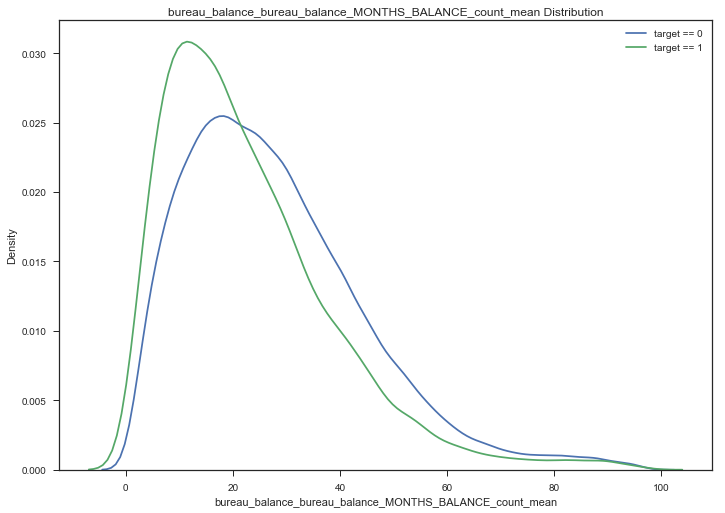

In [240]:
plot_KDE(var_name='bureau_balance_bureau_balance_MONTHS_BALANCE_count_mean', df=train_dataset)

### Collinear variables

In [251]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_variables = {}

# For each column, record the variables that are above threshold
for col in correlations:
    above_threshold_variables[col] = list(correlations.index[correlations[col] > threshold])

In [252]:
above_threshold_variables

{'AMT_ANNUITY': ['AMT_ANNUITY'],
 'AMT_CREDIT': ['AMT_CREDIT', 'AMT_GOODS_PRICE'],
 'AMT_GOODS_PRICE': ['AMT_CREDIT', 'AMT_GOODS_PRICE'],
 'AMT_INCOME_TOTAL': ['AMT_INCOME_TOTAL'],
 'AMT_REQ_CREDIT_BUREAU_DAY': ['AMT_REQ_CREDIT_BUREAU_DAY'],
 'AMT_REQ_CREDIT_BUREAU_HOUR': ['AMT_REQ_CREDIT_BUREAU_HOUR'],
 'AMT_REQ_CREDIT_BUREAU_MON': ['AMT_REQ_CREDIT_BUREAU_MON'],
 'AMT_REQ_CREDIT_BUREAU_QRT': ['AMT_REQ_CREDIT_BUREAU_QRT'],
 'AMT_REQ_CREDIT_BUREAU_WEEK': ['AMT_REQ_CREDIT_BUREAU_WEEK'],
 'AMT_REQ_CREDIT_BUREAU_YEAR': ['AMT_REQ_CREDIT_BUREAU_YEAR'],
 'ANNUITY_INCOME_PERCENT': ['ANNUITY_INCOME_PERCENT'],
 'APARTMENTS_AVG': ['LIVINGAPARTMENTS_MODE',
  'LIVINGAPARTMENTS_MEDI',
  'LIVINGAPARTMENTS_AVG',
  'APARTMENTS_MODE',
  'APARTMENTS_MEDI',
  'APARTMENTS_AVG',
  'LIVINGAREA_MODE',
  'ELEVATORS_MODE',
  'TOTALAREA_MODE',
  'LIVINGAREA_MEDI',
  'LIVINGAREA_AVG',
  'ELEVATORS_MEDI',
  'ELEVATORS_AVG'],
 'APARTMENTS_MEDI': ['LIVINGAPARTMENTS_MODE',
  'LIVINGAPARTMENTS_MEDI',
  'LIVINGAPARTMEN

In [258]:
# Remove the variables that 
cols_to_remove = set()
cols_seen = []

for k, v in above_threshold_variables.items():
    
    cols_seen.append(k)
    
    for colname in v:
        
        if k == colname:
            continue
        
        if colname not in cols_seen:
            cols_to_remove.add(colname)
        
cols_to_remove = list(cols_to_remove)


In [260]:
len(cols_to_remove)

139

In [263]:
train_corrs_removed = train_dataset.drop(columns=cols_to_remove)
test_corrs_removed = test_dataset.drop(columns=cols_to_remove)

print("Training dataset shape: ", train_corrs_removed.shape)
print("Testing dataset shape: ", test_corrs_removed.shape)

ValueError: labels ['burean_CREDIT_ACTIVE_Bad debt_mean'
 'burean_CREDIT_TYPE_Consumer credit_sum'
 'burean_CREDIT_TYPE_Cash loan (non-earmarked)_mean'
 'burean_CREDIT_TYPE_Mobile operator loan_mean'
 'burean_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean'
 'burean_CREDIT_TYPE_Interbank credit_mean'
 'burean_CREDIT_CURRENCY_currency 1_sum' 'burean_CREDIT_ACTIVE_Closed_sum'
 'burean_CREDIT_CURRENCY_currency 4_mean'] not contained in axis